In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/full'
data_path = '../../../data/boston'

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)


heatmap

2.5e-05_1000.0.pckl
5e-05_1e+09.pckl
5e-05_10.0.pckl
2.5e-06_1e+07.pckl
5e-06_1e+07.pckl
1e-06_100000.0.pckl
1e-06_10.0.pckl
1e-05_10.0.pckl
5e-06_100000.0.pckl
2.5e-06_1000.0.pckl
5e-06_1000.0.pckl
2.5e-05_10.0.pckl
2.5e-06_100000.0.pckl
2.5e-06_10.0.pckl
5e-06_1e+09.pckl
2.5e-05_100000.0.pckl
2.5e-05_1e+09.pckl
1e-05_1e+09.pckl
5e-05_1e+07.pckl
1e-05_100000.0.pckl
2.5e-06_1e+09.pckl
5e-05_1000.0.pckl
5e-05_100000.0.pckl
1e-05_1e+07.pckl
1e-06_1000.0.pckl
1e-06_1e+07.pckl
1e-06_1e+09.pckl
2.5e-05_1e+07.pckl
1e-05_1000.0.pckl
5e-06_10.0.pckl
best alpha 1000.0 lr 2.5e-06


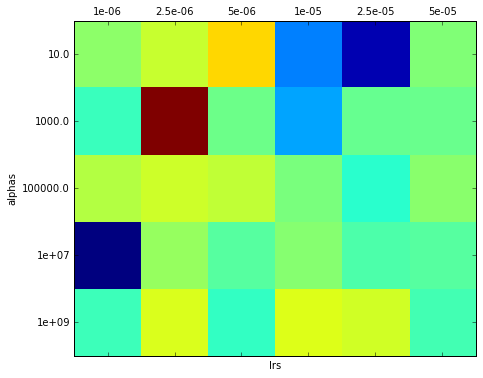

In [2]:
results = []
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        data = pickle.load(inp)
        results.append((data['lr'], data['alpha'], data['validation'][-1]))
        
alphas = sorted(list(set([r[1] for r in results])))
lrs = sorted(list(set([r[0] for r in results])))
matrix = np.zeros((len(alphas), len(lrs)))
for r in results:
    lr_id = lrs.index(r[0])
    a_id = alphas.index(r[1])
    q = r[2]
    matrix[a_id, lr_id] = q
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(matrix)
plt.ylabel('alphas')
plt.xlabel('lrs')
ax.set_yticklabels(['']+  [str(a) for a in alphas])
ax.set_xticklabels([''] + [str(l) for l in lrs])
best = np.where(matrix == np.max(matrix))
print 'best', 'alpha', alphas[best[0][0]], 'lr', lrs[best[1][0]]

convergence

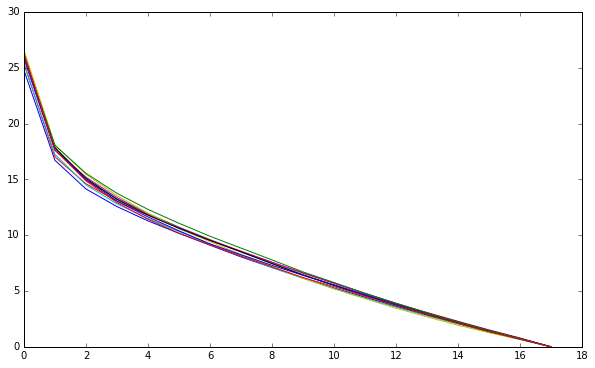

In [5]:
with open(os.path.join(load_path, '1e-05_1e+07.pckl')) as inp:
    data = pickle.load(inp)
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

stability (noise in data)

0.0 9.40966692786 1.66233885185
0.1 16.8609716078 2.67621414363
0.2 37.338836701 3.45440975787
0.3 64.3669856437 4.70109016162
0.4 97.7746094253 6.32445885732
0.5 125.816431274 8.44192015052
0.6 152.069383846 9.94463646758
0.7 178.456496778 17.0833039007
0.8 206.491452943 20.8836463995
0.9 233.505886531 17.9436541596
1.0 253.027495412 19.2672081453
1.1 271.952479799 22.7085045267
1.2 300.239834894 16.1569785843
1.3 320.197993589 38.9029816755
1.4 346.529492669 31.1758622321
1.5 367.94076834 34.7175564515
1.6 377.704284282 28.2289758872
1.7 418.140700666 26.488322253
1.8 409.927390609 34.1977683583
1.9 436.995953892 37.0718835816


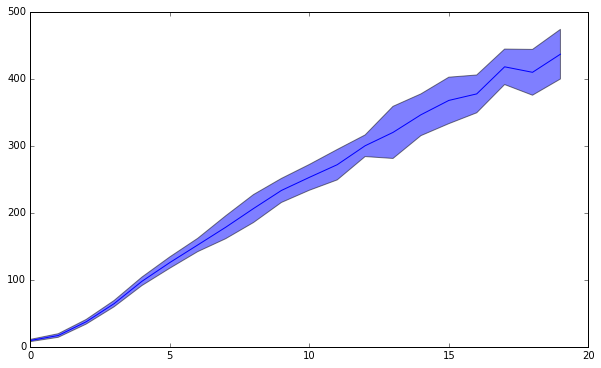

In [6]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-05_1e+07.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


stability (noise in params)

0.0 9.40966692786 1.66233885185
0.1 11.8508376265 2.8949807409
0.2 18.0144919139 3.77937121834
0.3 45.5993271629 33.6130251896
0.4 54.7389972439 37.1101414835
0.5 92.6575510006 52.8806909201
0.6 112.113836712 69.8146063451
0.7 156.240947262 99.0525226585
0.8 194.662245879 87.4627439606
0.9 326.810320762 280.038101491
1.0 297.514139447 155.569953312
1.1 297.965939275 190.743318353
1.2 694.023112458 604.249636207
1.3 227.659542384 104.182674027
1.4 301.812299161 180.472102902
1.5 251.222154895 94.2932529737
1.6 503.604060292 327.661009622
1.7 581.90123805 428.701417983
1.8 398.799323669 261.638779129
1.9 438.102036775 299.048195849


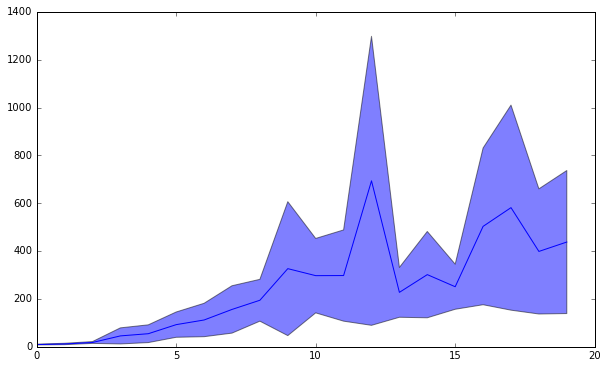

In [7]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-05_1e+07.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


learning curve

0
50
100
150
200
250
300


(0, 50000)

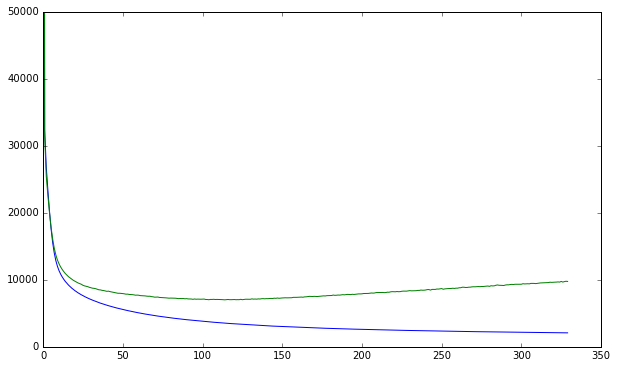

In [3]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'1e-07_10.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
plt.plot(results_train)
plt.plot(results_test)
plt.ylim((0,50000))
#results_validation = np.array(results_validation)
#results_validation = (results_validation-np.min(results_validation))/(np.max(results_validation) - np.min(results_validation))
#print results_validation
#results_validation = results_validation*np.mean([result_test, result_train])
#plt.plot(results_validation)
#plt.xlim((1,len(results_validation)))

In [ ]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'1e-07_10.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)

#results_validation = np.array(results_validation)
#results_validation = (results_validation-np.min(results_validation))/(np.max(results_validation) - np.min(results_validation))
#print results_validation
#results_validation = results_validation*np.mean([result_test, result_train])
plt.plot(-results_validation)
plt.ylim((0,100))
#plt.xlim((1,len(results_validation)))

0
50
100
150
200
250
300
